# Fraud Detection using Self Organizing Map

In [ ]:
"""
Fraud Detection:

Imagine we are deep learning scientist working for bank and we are given a data set
that contains information of customers from this bank applying for advanced
credit card.

So basically, these informations are the data that customers had to provide
when filling the application form.

Our mission is to detect potential fraud within these applications.

We have to give explicit list, of the customers who potentially cheated.

we will not make a supervised deep learning model and try to predict if each
customer potentially cheated; yes or no with a dependent variable that has binary
values.

we need to identify some patterns in a high dimensional data sets that have
non-linear relationships. And one of these patterns(customers) will be 
the potential fraud. That is the customers who potentially cheated.

We have to return the potential fraudulent customers. <-- unsupervised learning.
"""

In [1]:
# Importing the libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
"""
This file concerns credit card applications. All attribute names and values have 
been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, 
nominal with small numbers of values, and nominal with larger numbers of values. 
There are also a few missing values.
"""

In [2]:
# Importing the dataset

dataset = pd.read_csv('Credit_Card_Applications.csv')

df      = dataset.copy()

df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [4]:
X[:5]

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, 1.1460000e+01,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.5850000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, 1.7500000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5687688e+07, 0.0000000e+00, 2.1670000e+01, 1.1500000e+01,
        1.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00,

In [5]:
y[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [ ]:
"""
for each customer, the winning node is the most similar neuron to the customer, then, 
we use a neighborhood function like the galch neighborhood function,
to update the weight of the neighbors of the winning node to move them closer to 
the point. We do this for all the customers in the input space.

So we'll repeat that again. We'll repeat all this many times.
And each time we'll repeat it, the output space decreases and loses dimensions.

It reduces its dimension little by little. And then it reaches a point where 
the neighborhood stops decreasing, where the output space stops decreasing.

And that's the moment where we obtained our self organizing map in two dimensions
with all the winning nodes that were eventually identified.

when we think about frauds, we think about outliers because the fraud basically is
defined by something that is far from the general rules. So the frauds are actually
the outlying neurons for self-organizing map.

To detect the outline neurons, we need MID(Mean Interneuron Distance).

we're going to compute the mean of the Euclidean distance between this neuron 
and the neurons in its neighborhood.
"""

In [6]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

X = sc.fit_transform(X)

In [ ]:
"""
x and y are the dimensions of the grid to self-organizing map.
dimensions must not be too small because we want to get the outliers
in evidence. Therefore we need a bigger map to detect outliers easily.

input_len : len(columns of the X)

sigma is the radius of the different neighborhoods in the grid.
"""

In [14]:
# Training the SOM

from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

som.random_weights_init(X) # to initialize the weights randomly.

som.train_random(data = X, num_iteration = 100) # to train SOM.

In [ ]:
"""
basically, if MID is higher, then the winning node will be far away from it's 
neighbors. (Inside a neighborhood.) Therefore; higher the MID, the more the winning 
node is an outlier.

winning notes will be colored by different colors in such a way that the larger is 
the MID, the closer to white the color will be.
"""

In [ ]:
"""
we actually identified the outlier(fraud) in below.

to get the explicit list of the customers, we just need to the inverse mapping
of these winning nodes to see which customers are associated to this winning node.

also, we can add some markers to detect them in the map easily!
"""

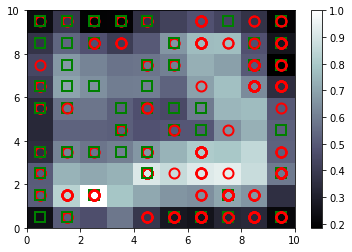

In [15]:
# Visualizing the results

from pylab import bone, pcolor, colorbar, plot, show

bone()                        # this is the window that will contain the map.
pcolor(som.distance_map().T)  # all the different colors corresponding to the MID's.
colorbar()                    # white colors are the outliers (frauds).
markers = ['o', 's']          # red circles(r, o) : the customers who didn't get approval.
colors  = ['r', 'g']          # green squares(g, s) : the customers who got approval.
for i, j in enumerate(X):     # i : indexes, j : all the vectors of customers at i.
    w = som.winner(j)         # winning node.
    plot(w[0] + 0.5,          # we want to put the marker at the center of the square.
         w[1] + 0.5,          # we want to put the marker at the center of the square.
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [16]:
# Finding the frauds

mappings = som.win_map(X)

# frauds   = np.concatenate((mappings[(4, 2)], mappings[(7, 3)]), axis = 0)

frauds   = np.array(mappings[(2, 1)])

frauds   = sc.inverse_transform(frauds)

In [17]:
frauds[:, 0:1] # frauds id's

array([[15651868.],
       [15716082.],
       [15651460.],
       [15672637.],
       [15769548.],
       [15752344.],
       [15736533.],
       [15673907.],
       [15779207.],
       [15611409.],
       [15792107.],
       [15636454.],
       [15615296.]])

-----------